In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Sales_Data.xlsx")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [6]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [7]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1984
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [11]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [10]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [8]:
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [7]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [9]:
df.shape

(2747, 20)

In [10]:
df[df.duplicated()].shape[0]

0

<AxesSubplot:>

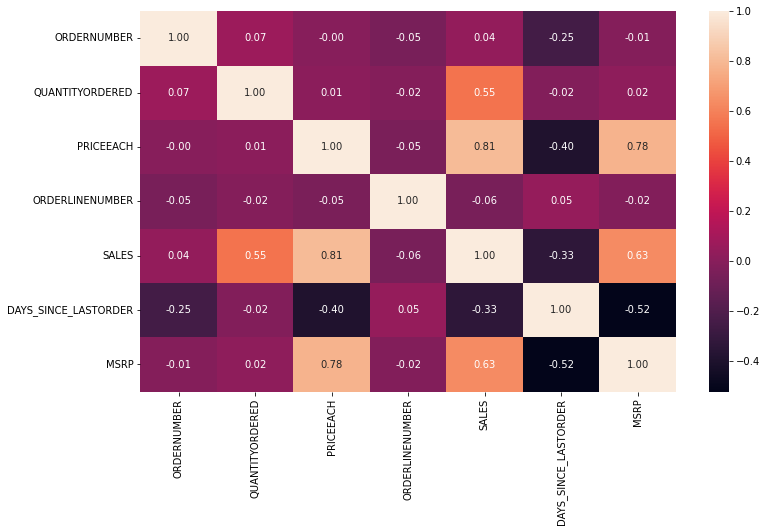

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')